https://www.kaggle.com/austinreese/craigslist-carstrucks-data

In [165]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import fnmatch
import warnings
from wordcloud import WordCloud

# Display preferences
%matplotlib inline
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 500)

In [173]:
# Create dataframe
cars = pd.read_csv('../../data/vehicles.csv')

## Data Cleaning 

In [3]:
print('Number of rows: {}'.format(cars.shape[0]))
print('Number of columns: {}'.format(cars.shape[1]))

Number of rows: 509577
Number of columns: 25


In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509577 entries, 0 to 509576
Data columns (total 25 columns):
id              509577 non-null int64
url             509577 non-null object
region          509577 non-null object
region_url      509577 non-null object
price           509577 non-null int64
year            508050 non-null float64
manufacturer    486813 non-null object
model           501588 non-null object
condition       277643 non-null object
cylinders       309894 non-null object
fuel            505592 non-null object
odometer        417253 non-null float64
title_status    506515 non-null object
transmission    505858 non-null object
vin             302152 non-null object
drive           365434 non-null object
size            167574 non-null object
type            368046 non-null object
paint_color     344871 non-null object
image_url       509563 non-null object
description     509561 non-null object
county          0 non-null float64
state           509577 non-null obj

In [9]:
cars.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7034441763,https://saltlakecity.craigslist.org/cto/d/salt...,salt lake city,https://saltlakecity.craigslist.org,17899,2012.0,volkswagen,golf r,excellent,4 cylinders,gas,63500.0,clean,manual,WVWPF7AJ6CW316713,4wd,compact,hatchback,black,https://images.craigslist.org/00G0G_fTLDWM5Xyv...,PRICE REDUCED! -Garage kept -Low Miles (63K)...,NaN,ut,40.7372,-111.858
1,7034440610,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,NaN,gas,10.0,clean,automatic,1FTMF1EP3GKF13544,4wd,NaN,NaN,NaN,https://images.craigslist.org/00v0v_7Cu0buIofU...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
2,7034440588,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,46463,2015.0,gmc,sierra 1500,excellent,NaN,gas,7554.0,clean,automatic,3GTU2WEC6FG228025,4wd,NaN,NaN,white,https://images.craigslist.org/01515_lPvJ9bfbdY...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
3,7034440546,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,NaN,gas,10.0,clean,automatic,1FTEX1EF6GKD25447,4wd,NaN,NaN,NaN,https://images.craigslist.org/00T0T_6Rjfp3NS4O...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
4,7034406932,https://saltlakecity.craigslist.org/ctd/d/evan...,salt lake city,https://saltlakecity.craigslist.org,49999,2018.0,ford,f-450,NaN,NaN,diesel,70150.0,clean,automatic,1FT8W4DT8GEA90427,4wd,NaN,pickup,white,https://images.craigslist.org/00W0W_8yIUwRBXXd...,2018 Ford F-350 F350 F 350 SD Lariat Crew Cab ...,NaN,ut,40.3744,-104.694


In [10]:
cars.tail()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,image_url,description,county,state,lat,long
509572,7034554007,https://saltlakecity.craigslist.org/ctd/d/engl...,salt lake city,https://saltlakecity.craigslist.org,15476,2012.0,nissan,xterra,NaN,6 cylinders,gas,103135.0,clean,automatic,5N1AN0NW0CC520698,4wd,NaN,SUV,NaN,https://images.craigslist.org/00z0z_3ERBmVoD5s...,Maximum Auto SearchÂ Â Â Â Â Â Â Â STOCK #:Â Â...,NaN,ut,39.6405,-104.961
509573,7034538385,https://saltlakecity.craigslist.org/ctd/d/engl...,salt lake city,https://saltlakecity.craigslist.org,9881,2008.0,bmw,3 series 328i,NaN,6 cylinders,gas,108277.0,clean,automatic,WBAWR33558P150498,rwd,NaN,convertible,NaN,https://images.craigslist.org/01313_38rMiNAW18...,Maximum Auto SearchÂ Â Â Â Â Â Â Â STOCK #:Â Â...,NaN,ut,39.6405,-104.961
509574,7034523643,https://saltlakecity.craigslist.org/ctd/d/salm...,salt lake city,https://saltlakecity.craigslist.org,24895,2019.0,jeep,cherokee,NaN,4 cylinders,gas,6973.0,clean,automatic,1C4PJMLB0KD267506,4wd,NaN,SUV,white,https://images.craigslist.org/00606_dOtGS5RmTi...,"2019 Jeep Cherokee Latitude Plus -- $24,895 ...",NaN,ut,45.1637,-113.894
509575,7034458858,https://saltlakecity.craigslist.org/cto/d/ogde...,salt lake city,https://saltlakecity.craigslist.org,32500,2017.0,NaN,Porsche Macan GTS,excellent,6 cylinders,gas,37520.0,clean,automatic,NaN,NaN,NaN,NaN,red,https://images.craigslist.org/00s0s_32yAwr0KMt...,2017 Porsche Macan GTS Carmine Red w/ Black ...,NaN,ut,41.3112,-111.969
509576,7034389294,https://saltlakecity.craigslist.org/ctd/d/evan...,salt lake city,https://saltlakecity.craigslist.org,12900,2012.0,ram,NaN,NaN,NaN,gas,152296.0,clean,automatic,3C6TD5HT1CG309173,4wd,NaN,pickup,black,https://images.craigslist.org/00E0E_3FtnUA2XPT...,"2012 RAM 2500 4WD Crew Cab 169"" ST"" Offere...",NaN,ut,40.3744,-104.694


In [13]:
cars.describe()

,id,price,year,odometer,county,lat,long
count,5.095770e+05,5.095770e+05,508050.000000,4.172530e+05,0.0,499285.000000,499285.000000
mean,7.044176e+09,5.479684e+04,2009.662236,1.017300e+05,NaN,38.453818,-94.313886
std,4.937219e+06,9.575025e+06,8.567953,1.073790e+05,NaN,5.902152,17.717653
min,6.995212e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-82.688100,-165.935000
25%,7.040802e+09,3.995000e+03,2007.000000,4.948800e+04,NaN,34.557400,-108.506000
50%,7.045325e+09,9.377000e+03,2011.000000,9.489400e+04,NaN,39.145300,-88.678800
75%,7.048556e+09,1.795500e+04,2015.000000,1.387780e+05,NaN,42.449000,-81.111400
max,7.050103e+09,3.600029e+09,2021.000000,1.000000e+07,NaN,81.569300,94.124800


In [14]:
cars.describe(include=['O'])

,url,region,region_url,manufacturer,model,condition,cylinders,fuel,title_status,transmission,vin,drive,size,type,paint_color,image_url,description,state
count,509577,509577,509577,486813,501588,277643,309894,505592,506515,505858,302152,365434,167574,368046,344871,509563,509561,509577
unique,509577,403,413,43,35852,6,8,5,6,3,180145,3,4,13,12,349468,427803,51
top,https://butte.craigslist.org/ctd/d/butte-2005-...,fayetteville,https://modesto.craigslist.org,ford,f-150,excellent,6 cylinders,gas,clean,automatic,WDC0G4JB4HF164180,4wd,full-size,sedan,white,https://images.craigslist.org/00i0i_ChcqziILO2...,CLEAN TITLE NO ACCEDINTS 3 YEARS WARRANTY D...,ca
freq,1,4501,2992,92601,11341,140663,111940,441688,487040,457659,114,170482,90481,93225,89322,167,160,52780


### Missing Values 

Ways to handle null values:
1. Remove row(s) or column(s) with missing values from dataset
2. Fill is missing values with unharmful values

In [3]:
# Missing values for each variable
cars.isnull().sum().sort_values()

id                   0
url                  0
region               0
region_url           0
price                0
state                0
image_url           14
description         16
year              1527
title_status      3062
transmission      3719
fuel              3985
model             7989
lat              10292
long             10292
manufacturer     22764
odometer         92324
type            141531
drive           144143
paint_color     164706
cylinders       199683
vin             207425
condition       231934
size            342003
county          509577
dtype: int64

In [4]:
# Percentage of missing values for each variable
round((cars.isnull().sum() / len(cars)) * 100, 4).sort_values()

id                0.0000
url               0.0000
region            0.0000
region_url        0.0000
price             0.0000
state             0.0000
image_url         0.0027
description       0.0031
year              0.2997
title_status      0.6009
transmission      0.7298
fuel              0.7820
model             1.5678
lat               2.0197
long              2.0197
manufacturer      4.4672
odometer         18.1178
type             27.7742
drive            28.2868
paint_color      32.3221
cylinders        39.1860
vin              40.7053
condition        45.5150
size             67.1151
county          100.0000
dtype: float64

Drop ```county``` and ```vin```

Remove records with missing values from ```image_url``` and ```description```

In [112]:
# Drop url, region_url, image_url
cars = cars.drop(['url', 'region_url', 'image_url', 'county', 'vin'], axis=1)

# Drop rows
cars = cars.dropna(subset=['description'])

Function

In [6]:
# Print unique values, number of unique values and value frequency details
def variable_details(column):
    print('The are {} unique values in {}\n'.format(cars[column].nunique(), column))
    print('The unique values are \n{}\n'.format(cars[column].unique()))
    print('The value frequency is \n{}'.format(cars[column].value_counts()))

### Missing values for ```year```

In [7]:
variable_details('year')

The are 114 unique values in year

The unique values are 
[2012. 2016. 2015. 2018. 2009. 2017. 2007. 2013. 1994. 2004. 2014. 2002.
 2003. 2019. 2010. 2008. 2001.   nan 1992. 2011. 1999. 1935. 2006. 2005.
 1981. 1950. 1955. 1977. 2000. 1951. 1998. 1986. 1995. 1997. 1993. 1991.
 1969. 2020. 1964. 1970. 1980. 1972. 1978. 1990. 1931. 1983. 1996. 1974.
 1971. 1966. 1988. 1952. 1943. 1940. 1956. 1982. 1987. 1959. 1958. 1973.
 1948. 1976. 1984. 1960. 1954. 1962. 1942. 1989. 1968. 1979. 1985. 1965.
 1967. 1963. 1939. 1953. 1929. 1949. 1917. 1947. 1932. 1975. 1946. 1957.
 1961. 1937. 1941. 1938. 1936. 1928. 1934. 1933. 1900. 2021. 1926. 1923.
 1919. 1930. 1920. 1927. 1901. 1902. 1925. 1918. 1912. 1922. 1924. 1945.
 1914. 1916. 1911. 1915. 1921. 1944. 1903.]

The value frequency is 
2016.0    41171
2015.0    37311
2014.0    35626
2013.0    35106
2012.0    33493
2017.0    33450
2011.0    31424
2008.0    28543
2007.0    26193
2010.0    24307
2018.0    22486
2006.0    22177
2009.0    19327
2005.0  

In [8]:
cars['year'].describe()

count    508048.000000
mean       2009.662248
std           8.567967
min        1900.000000
25%        2007.000000
50%        2011.000000
75%        2015.000000
max        2021.000000
Name: year, dtype: float64

In [174]:
cars[cars['year'].isnull()]

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,image_url,description,county,state,lat,long
23,7034290597,https://saltlakecity.craigslist.org/ctd/d/scot...,salt lake city,https://saltlakecity.craigslist.org,57995,NaN,NaN,olet Silverado 2500HD,NaN,8 cylinders,NaN,9458.0,clean,automatic,1GC1KSEY9KF246893,4wd,NaN,pickup,grey,https://images.craigslist.org/00E0E_1xWz0K6GU7...,2019 *Chevrolet* *Silverado 2500HD* LIFTED 201...,NaN,ut,33.4583,-111.926
26,7034229439,https://saltlakecity.craigslist.org/ctd/d/scot...,salt lake city,https://saltlakecity.craigslist.org,39995,NaN,NaN,ierra 1500,NaN,8 cylinders,NaN,15708.0,clean,automatic,3GTU2MEC0JG379519,4wd,NaN,pickup,black,https://images.craigslist.org/00m0m_g6KwfhQxp8...,2018 *GMC* *Sierra 1500* LIFTED 2018 GMC SIERR...,NaN,ut,33.4583,-111.926
31,7034158475,https://saltlakecity.craigslist.org/ctd/d/scot...,salt lake city,https://saltlakecity.craigslist.org,43995,NaN,NaN,olet Silverado 1500,NaN,6 cylinders,NaN,7238.0,clean,automatic,3GCPYBEH9KG157560,4wd,NaN,pickup,black,https://images.craigslist.org/00V0V_vy7IG6m1KW...,2019 *Chevrolet* *Silverado 1500* BLACK ON BLA...,NaN,ut,33.4583,-111.926
33,7034078036,https://saltlakecity.craigslist.org/ctd/d/scot...,salt lake city,https://saltlakecity.craigslist.org,43995,NaN,NaN,ierra 1500,NaN,8 cylinders,gas,9968.0,clean,automatic,1GTR9CED3KZ188151,4wd,NaN,pickup,red,https://images.craigslist.org/00t0t_iQ7IgkaMIa...,"2019 *GMC* *Sierra 1500* 4WD Double Cab 147"" E...",NaN,ut,33.4583,-111.926
34,7034037779,https://saltlakecity.craigslist.org/ctd/d/scot...,salt lake city,https://saltlakecity.craigslist.org,59995,NaN,NaN,ierra 1500,NaN,8 cylinders,NaN,9228.0,clean,automatic,1GTU9FEL8KZ151650,4wd,NaN,pickup,white,https://images.craigslist.org/00808_khexDg3pEq...,2019 *GMC* *Sierra 1500* LIFTED NEXT GEN GMC D...,NaN,ut,33.4583,-111.926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509543,7035344121,https://saltlakecity.craigslist.org/ctd/d/scot...,salt lake city,https://saltlakecity.craigslist.org,59995,NaN,NaN,Super Duty F-250 SRW,NaN,8 cylinders,NaN,6186.0,clean,automatic,1FT7W2BT4KED70969,4wd,NaN,pickup,NaN,https://images.craigslist.org/00101_17Y8oslQBt...,2019 *Ford* *Super Duty F-250 SRW* SPECIAL ORD...,NaN,ut,33.4583,-111.926
509560,7034781861,https://saltlakecity.craigslist.org/ctd/d/scot...,salt lake city,https://saltlakecity.craigslist.org,56995,NaN,NaN,olet Silverado 2500HD,NaN,8 cylinders,NaN,7452.0,clean,automatic,1GC1KSEY1KF252834,4wd,NaN,pickup,white,https://images.craigslist.org/01414_2eFznwplTh...,2019 *Chevrolet* *Silverado 2500HD* LIFTED 201...,NaN,ut,33.4583,-111.926
509563,7034710859,https://saltlakecity.craigslist.org/ctd/d/scot...,salt lake city,https://saltlakecity.craigslist.org,46995,NaN,NaN,ierra 1500,NaN,8 cylinders,NaN,7525.0,clean,automatic,3GTU2PEC0JG122474,4wd,NaN,pickup,black,https://images.craigslist.org/00K0K_jtQ6E27Iei...,2018 *GMC* *Sierra 1500* LIFTED 18 GMC SIERRA ...,NaN,ut,33.4583,-111.926
509568,7034633715,https://saltlakecity.craigslist.org/ctd/d/scot...,salt lake city,https://saltlakecity.craigslist.org,41995,NaN,NaN,F-150,NaN,6 cylinders,NaN,12526.0,clean,automatic,1FTEW1EP1JFC19046,4wd,NaN,pickup,white,https://images.craigslist.org/00Q0Q_1kaWPiGW67...,2018 *Ford* *F-150* XLT 4WD SuperCrew 5.5' Box...,NaN,ut,33.4583,-111.926


In [9]:
# Populate missing values using mean
cars['year'] = cars['year'].fillna(cars['year'].mean())

### Missing values for ```title_status```

In [10]:
variable_details('title_status')

The are 6 unique values in title_status

The unique values are 
['clean' 'rebuilt' 'salvage' 'lien' nan 'missing' 'parts only']

The value frequency is 
clean         487038
rebuilt        10473
salvage         5324
lien            2848
missing          607
parts only       223
Name: title_status, dtype: int64


In [11]:
# Populate missing values using 'missing' categorical value
cars['title_status'] = cars['title_status'].fillna('missing')

### Missing values for ```transmission```

In [12]:
variable_details('transmission')

The are 3 unique values in transmission

The unique values are 
['manual' 'automatic' 'other' nan]

The value frequency is 
automatic    457657
manual        33962
other         14237
Name: transmission, dtype: int64


In [13]:
# Populate missing values using 'other' categorical value
cars.transmission = cars.transmission.fillna('other')

### Missing values for ```fuel```

In [14]:
variable_details('fuel')

The are 5 unique values in fuel

The unique values are 
['gas' 'diesel' 'other' nan 'electric' 'hybrid']

The value frequency is 
gas         441686
diesel       41986
other        17100
hybrid        4052
electric       766
Name: fuel, dtype: int64


In [15]:
# Populate missing values using 'other' categorical value
cars['fuel'].fillna('other', inplace=True)

### Missing values for ```model```

In [113]:
variable_details('model')

The are 35851 unique values in model

The unique values are 
['golf r' 'f-150' 'sierra 1500' ... 'Camaro 2-door coupe'
 'Isuzu VehiCROSS' 'peterbilt 378']

The value frequency is 
f-150                         11341
silverado 1500                 7405
1500                           7367
silverado                      5256
2500                           4439
                              ...  
500x lounge fwd                   1
isuzu commercial                  1
durango crew lux awd 3rd r        1
camry limited edition             1
335i 2d. convertible              1
Name: model, Length: 35851, dtype: int64


In [117]:
cars = cars.dropna(subset=['model'])

### Missing values for ```lat``` and ```long```

In [17]:
variable_details('region')

The are 403 unique values in region

The unique values are 
['salt lake city' 'st george' 'lynchburg' 'vermont' 'new river valley'
 'norfolk / hampton roads' 'richmond' 'charlottesville' 'roanoke'
 'danville' 'fredericksburg' 'bellingham' 'harrisonburg'
 'kennewick-pasco-richland' 'moses lake' 'southwest VA' 'winchester'
 'lewiston / clarkston' 'olympic peninsula' 'seattle-tacoma'
 'skagit / island / SJI' 'yakima' 'wenatchee' "spokane / coeur d'alene"
 'madison' 'milwaukee' 'charleston' 'eastern panhandle' 'green bay'
 'kenosha-racine' 'morgantown' 'southern WV' 'west virginia (old)'
 'appleton-oshkosh-FDL' 'eau claire' 'duluth / superior' 'la crosse'
 'janesville' 'wausau' 'wyoming' 'northern WI' 'sheboygan'
 'gadsden-anniston' 'birmingham' 'huntsville / decatur' 'dothan' 'phoenix'
 'little rock' 'anchorage / mat-su' 'mobile' 'montgomery' 'tuscaloosa'
 'auburn' 'flagstaff / sedona' 'mohave county' 'florence / muscle shoals'
 'tucson' 'fairbanks' 'kenai peninsula' 'southeast alaska' 'y

In [81]:
variable_details('lat')

The are 51814 unique values in lat

The unique values are 
[40.7372 40.5881 40.3744 ... 40.758  38.8787 41.3112]

The value frequency is 
43.1824    2339
47.6561    2146
40.4688    2077
46.2348    2057
33.7865    1814
           ... 
40.4484       1
36.8102       1
38.0390       1
48.1035       1
39.4341       1
Name: lat, Length: 51814, dtype: int64


In [83]:
variable_details('long')

The are 51793 unique values in long

The unique values are 
[-111.858 -111.884 -104.694 ... -115.226 -111.625 -111.97 ]

The value frequency is 
-84.1122     2339
-117.2370    2146
-74.2817     2077
-119.1280    2057
-84.4454     1813
             ... 
-83.6655        1
-74.3972        1
-102.6200       1
-118.7000       1
-78.9648        1
Name: long, Length: 51793, dtype: int64


In [19]:
region_mean = cars.groupby(['region'])[['lat', 'long']].mean()

In [73]:
region_mean_lookup = region_mean.to_dict('index')

In [74]:
region_mean_lookup

{'SF bay area': {'lat': 37.671301646655316, 'long': -121.56228548884987},
 'abilene': {'lat': 32.65704451403889, 'long': -95.44789200863936},
 'akron / canton': {'lat': 40.98484520641404, 'long': -81.53925789832859},
 'albany': {'lat': 42.29407989317023, 'long': -74.20299275085844},
 'albuquerque': {'lat': 35.296386586206665, 'long': -106.33476334482806},
 'altoona-johnstown': {'lat': 40.40064394463673, 'long': -78.67450311418698},
 'amarillo': {'lat': 34.94455783879523, 'long': -101.34084464127558},
 'ames': {'lat': 41.8057340248963, 'long': -93.12403195020745},
 'anchorage / mat-su': {'lat': 61.05905485502326, 'long': -149.42705097774652},
 'ann arbor': {'lat': 42.518077801724104, 'long': -83.8487925646553},
 'annapolis': {'lat': 38.8226169491525, 'long': -76.43835734463279},
 'appleton-oshkosh-FDL': {'lat': 44.135732051875635,
  'long': -88.61503594256575},
 'asheville': {'lat': 35.33552466369941, 'long': -82.61862472799206},
 'ashtabula': {'lat': 41.70146029411766, 'long': -81.2321

In [21]:
lat_nulls = cars[cars['lat'].isnull()].index.tolist()

In [22]:
long_nulls = cars[cars['long'].isnull()].index.tolist()

In [23]:
def lat_long_combination(lat, long):
    
    print('Latitude length is {}'.format(len(lat)))
    print('Longitude length is {}'.format(len(long)))
    
    is_not_valid = 0
    
    for i in range(len(lat)):
        
        if lat[i] != long[i]:
            is_not_valid += 1
            
    print('There were {} invalid combinations found'.format(str(is_not_valid)))

In [24]:
lat_long_combination(lat_nulls, long_nulls)

Latitude length is 10278
Longitude length is 10278
There were 0 invalid combinations found


In [75]:
def retrieve_lat(region):
    latitude = region_mean_lookup[region]['lat']
    return latitude

In [76]:
def retrieve_long(region):
    longitude = region_mean_lookup[region]['long']
    return longitude

In [71]:
cars_lat_long = cars[cars[['lat', 'long']].isnull().any(axis=1)]

In [77]:
for i in cars_lat_long.index:
    cars['lat'][i] = retrieve_lat(cars['region'][i])
    cars['long'][i] = retrieve_long(cars['region'][i])

### Missing values for ```manufacturer```

In [59]:
variable_details('manufacturer')

The are 43 unique values in manufacturer

The unique values are 
['volkswagen' 'ford' 'gmc' 'ram' 'toyota' 'chevrolet' 'mercedes-benz'
 'jeep' nan 'honda' 'lexus' 'cadillac' 'dodge' 'hyundai' 'subaru' 'bmw'
 'chrysler' 'nissan' 'mitsubishi' 'buick' 'acura' 'kia' 'rover'
 'alfa-romeo' 'mazda' 'saturn' 'pontiac' 'volvo' 'jaguar' 'fiat' 'audi'
 'mini' 'infiniti' 'lincoln' 'mercury' 'tesla' 'harley-davidson' 'porche'
 'land rover' 'aston-martin' 'ferrari' 'datsun' 'hennessey' 'morgan']

The value frequency is 
ford               92600
chevrolet          73661
toyota             38159
nissan             26435
ram                26177
honda              25585
jeep               23951
gmc                23126
dodge              19344
bmw                13468
hyundai            12182
mercedes-benz      11569
subaru             10259
volkswagen         10214
chrysler            8866
kia                 8821
cadillac            7304
buick               6357
lexus               6292
mazda        

In [116]:
cars['manufacturer'].isnull().sum()

22749

In [86]:
cars[cars['manufacturer'].isnull()].head(20)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,image_url,description,state,lat,long
23,7034290597,https://saltlakecity.craigslist.org/ctd/d/scot...,salt lake city,https://saltlakecity.craigslist.org,57995,2009.662248,NaN,olet Silverado 2500HD,NaN,8 cylinders,other,9458.0,clean,automatic,4wd,NaN,pickup,grey,https://images.craigslist.org/00E0E_1xWz0K6GU7...,2019 *Chevrolet* *Silverado 2500HD* LIFTED 201...,ut,33.4583,-111.9260
26,7034229439,https://saltlakecity.craigslist.org/ctd/d/scot...,salt lake city,https://saltlakecity.craigslist.org,39995,2009.662248,NaN,ierra 1500,NaN,8 cylinders,other,15708.0,clean,automatic,4wd,NaN,pickup,black,https://images.craigslist.org/00m0m_g6KwfhQxp8...,2018 *GMC* *Sierra 1500* LIFTED 2018 GMC SIERR...,ut,33.4583,-111.9260
30,7034166384,https://saltlakecity.craigslist.org/cto/d/sain...,salt lake city,https://saltlakecity.craigslist.org,30000,1992.000000,NaN,American General,excellent,8 cylinders,diesel,13000.0,clean,automatic,4wd,NaN,NaN,NaN,https://images.craigslist.org/00V0V_lhx9i0Mzur...,1992 M998 HMMWV with only 13k original miles. ...,ut,31.9045,-110.2140
31,7034158475,https://saltlakecity.craigslist.org/ctd/d/scot...,salt lake city,https://saltlakecity.craigslist.org,43995,2009.662248,NaN,olet Silverado 1500,NaN,6 cylinders,other,7238.0,clean,automatic,4wd,NaN,pickup,black,https://images.craigslist.org/00V0V_vy7IG6m1KW...,2019 *Chevrolet* *Silverado 1500* BLACK ON BLA...,ut,33.4583,-111.9260
33,7034078036,https://saltlakecity.craigslist.org/ctd/d/scot...,salt lake city,https://saltlakecity.craigslist.org,43995,2009.662248,NaN,ierra 1500,NaN,8 cylinders,gas,9968.0,clean,automatic,4wd,NaN,pickup,red,https://images.craigslist.org/00t0t_iQ7IgkaMIa...,"2019 *GMC* *Sierra 1500* 4WD Double Cab 147"" E...",ut,33.4583,-111.9260
34,7034037779,https://saltlakecity.craigslist.org/ctd/d/scot...,salt lake city,https://saltlakecity.craigslist.org,59995,2009.662248,NaN,ierra 1500,NaN,8 cylinders,other,9228.0,clean,automatic,4wd,NaN,pickup,white,https://images.craigslist.org/00808_khexDg3pEq...,2019 *GMC* *Sierra 1500* LIFTED NEXT GEN GMC D...,ut,33.4583,-111.9260
47,7033830282,https://saltlakecity.craigslist.org/ctd/d/2010...,salt lake city,https://saltlakecity.craigslist.org,23800,2010.000000,NaN,wheelchair van,NaN,NaN,gas,37700.0,clean,automatic,NaN,NaN,NaN,NaN,https://images.craigslist.org/00606_3yNSEz1TEU...,For more pictures please visit one of OUR WEB ...,ut,33.4564,-112.1280
55,7033599808,https://saltlakecity.craigslist.org/ctd/d/scot...,salt lake city,https://saltlakecity.craigslist.org,44995,2009.662248,NaN,a Tundra,NaN,8 cylinders,gas,9650.0,clean,automatic,4wd,NaN,pickup,grey,https://images.craigslist.org/00N0N_dhUDr9qU6r...,2019 *Toyota* *Tundra* LIFTED TOYOTA TUNDRA 20...,ut,33.4583,-111.9260
82,7032992413,https://saltlakecity.craigslist.org/ctd/d/scot...,salt lake city,https://saltlakecity.craigslist.org,37995,2009.662248,NaN,olet Silverado 1500,NaN,6 cylinders,other,15252.0,clean,automatic,4wd,NaN,pickup,black,https://images.craigslist.org/01010_kIKzqB3q0D...,2018 *Chevrolet* *Silverado 1500* LIFTED SILVE...,ut,33.4583,-111.9260
89,7032950500,https://saltlakecity.craigslist.org/ctd/d/scot...,salt lake city,https://saltlakecity.craigslist.org,59995,2009.662248,NaN,ierra 1500,NaN,8 cylinders,other,6815.0,clean,automatic,4wd,NaN,pickup,black,https://images.craigslist.org/01515_hfqrvtkgFN...,2019 *GMC* *Sierra 1500* LIFTED NEXT GEN GMC D...,ut,33.4583,-111.9260


In [178]:
cars[cars['manufacturer'].isnull()]['description'][23]

'2019 *Chevrolet* *Silverado 2500HD* LIFTED 2019 CHEVY 2500HD DURAMAX DIESEL.9K MILES. LEATHER.Z71 Truck - $57,995Call Us Today! 520-365-3483Text Us Today! John Paul at 520-214-6347Chevrolet_ Silverado 2500HD_ For Sale by TRUCKMAX www.MyTruckmax.com   We offer FREE SHIPPING!      Vehicle Description For This *Chevrolet* *Silverado 2500HD*BRAND NEW 7" RC LIFT KIT WITH LIFE TIME WARRANTY WITH PARTS AND LABOROnlyÂ\xa0 9,000 Actual Miles on thisÂ\xa0CarFax CertifiedÂ\xa0One Owner with Full FactoryÂ\xa0Bumper to BumperÂ\xa0Warranty Remaining.Â\xa0 This New Body Style LiftedÂ\xa0Chevy 2500HDÂ\xa0Z71Â\xa0Â\xa0is Guaranteed to be the NICEST IN IT\'S CLASSÂ\xa0Â\xa0 Just had a Brand NewÂ\xa07 inch Rough CountryÂ\xa0Lift Kit installed by our Factory Certified GM technicians.(Lifetime Warranty, Parts and Labor). The Truck\'s Perfect !Â\xa0 Â\xa0  Not a dent, scratch, or swirl mark on this Immaculate GRAPHITE METTALIC Exterior. The RichÂ\xa0BlackÂ\xa0LeatherÂ\xa0Interior reveals all signs of a One

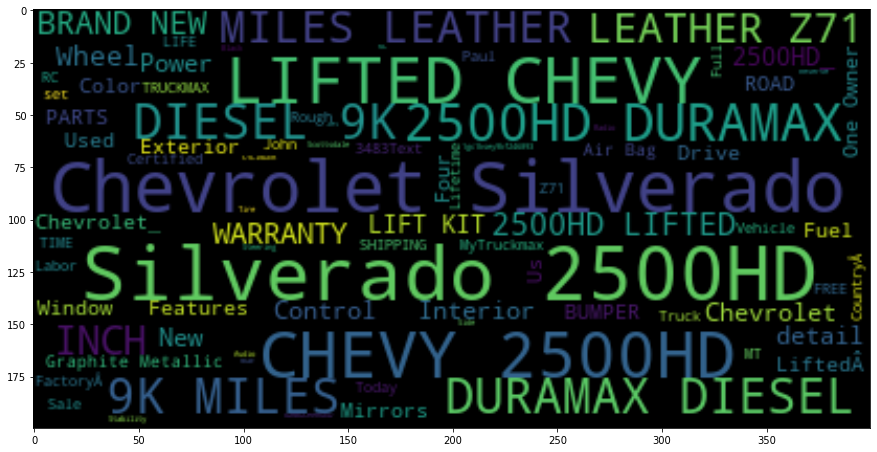

In [179]:
    wc = WordCloud().generate(text)
    plt.figure(figsize=(15, 10))
    plt.imshow(wc, interpolation='bilinear')
    plt.show()

In [180]:
wc.words_

{'Silverado 2500HD': 1.0,
 'Chevrolet Silverado': 0.9090909090909091,
 'LIFTED CHEVY': 0.7272727272727273,
 'CHEVY 2500HD': 0.7272727272727273,
 '2500HD DURAMAX': 0.7272727272727273,
 'DURAMAX DIESEL': 0.7272727272727273,
 'DIESEL 9K': 0.7272727272727273,
 '9K MILES': 0.7272727272727273,
 'MILES LEATHER': 0.7272727272727273,
 'LEATHER Z71': 0.7272727272727273,
 'INCH': 0.6363636363636364,
 '2500HD LIFTED': 0.6363636363636364,
 'BRAND NEW': 0.6363636363636364,
 'WARRANTY': 0.5454545454545454,
 'Wheel': 0.45454545454545453,
 'Chevrolet': 0.36363636363636365,
 '2500HD_': 0.36363636363636365,
 'New': 0.36363636363636365,
 'Interior': 0.36363636363636365,
 'detail': 0.36363636363636365,
 'Power': 0.36363636363636365,
 'Control': 0.36363636363636365,
 'LIFT KIT': 0.36363636363636365,
 'Us': 0.2727272727272727,
 'PARTS': 0.2727272727272727,
 'BUMPER': 0.2727272727272727,
 'LiftedÂ': 0.2727272727272727,
 'Exterior': 0.2727272727272727,
 'Fuel': 0.2727272727272727,
 'ROAD': 0.2727272727272727,


In [139]:
car_list_filtered = fnmatch.filter(car_list, '*Chev*')

In [140]:
car_list_filtered

['*Chevrolet*']

### Missing values for ```odometer```

In [60]:
variable_details('odometer')

The are 119873 unique values in odometer

The unique values are 
[6.3500e+04 1.0000e+01 7.5540e+03 ... 3.9457e+04 8.3200e+05 6.9730e+03]

The value frequency is 
0.0         2268
150000.0    1161
140000.0    1138
130000.0    1115
160000.0    1059
            ... 
45894.0        1
91786.0        1
183571.0       1
121871.0       1
71542.0        1
Name: odometer, Length: 119873, dtype: int64


### Missing values for ```type```

In [61]:
variable_details('type')

The are 13 unique values in type

The unique values are 
['hatchback' nan 'pickup' 'SUV' 'sedan' 'truck' 'wagon' 'van' 'coupe'
 'convertible' 'other' 'offroad' 'mini-van' 'bus']

The value frequency is 
sedan          93225
SUV            92300
pickup         49547
truck          49509
coupe          19106
other          13631
hatchback      12850
wagon          10937
van            10579
convertible     7737
mini-van        7170
offroad          742
bus              712
Name: type, dtype: int64


In [72]:
# Populate missing values using 'other' categorical value
cars['type'] = cars['type'].fillna('other')

### Missing values for ```drive```

In [62]:
variable_details('drive')

The are 3 unique values in drive

The unique values are 
['4wd' nan 'fwd' 'rwd']

The value frequency is 
4wd    170480
fwd    127190
rwd     67762
Name: drive, dtype: int64


In [73]:
# Populate missing values using 'missing'
cars['drive'] = cars['drive'].fillna('unknown')

### Missing values for ```paint_color```

In [63]:
variable_details('paint_color')

The are 12 unique values in paint_color

The unique values are 
['black' nan 'white' 'silver' 'brown' 'blue' 'grey' 'red' 'custom'
 'purple' 'yellow' 'green' 'orange']

The value frequency is 
white     89321
black     70580
silver    51352
blue      34584
red       34410
grey      33289
green      9192
custom     8894
brown      7758
yellow     2533
orange     2125
purple      831
Name: paint_color, dtype: int64


In [ ]:
# Populate missing values using 'other'
cars['paint_color'] = cars['paint_color'].fillna('unknown')

### Missing values for ```cylinders```

In [65]:
variable_details('cylinders')

The are 8 unique values in cylinders

The unique values are 
['4 cylinders' nan '8 cylinders' '6 cylinders' '10 cylinders'
 '5 cylinders' '3 cylinders' '12 cylinders' 'other']

The value frequency is 
6 cylinders     111940
8 cylinders      95370
4 cylinders      95308
5 cylinders       2714
10 cylinders      2299
other             1506
3 cylinders        562
12 cylinders       193
Name: cylinders, dtype: int64


In [ ]:
# Populate missing values using 'other' categorical value
cars['cylinders'] = cars['cylinders'].fillna('other')

### Missing values for ```condition```

In [67]:
variable_details('condition')

The are 6 unique values in condition

The unique values are 
['excellent' nan 'good' 'like new' 'fair' 'new' 'salvage']

The value frequency is 
excellent    140662
good          97261
like new      28166
fair           9461
new            1406
salvage         686
Name: condition, dtype: int64


In [ ]:
# Populate missing values using 'unknown'
cars['condition'] = cars['condition'].fillna('unknown')

### Missing values for ```size```

In [68]:
variable_details('size')

The are 4 unique values in size

The unique values are 
['compact' nan 'mid-size' 'full-size' 'sub-compact']

The value frequency is 
full-size      90481
mid-size       47756
compact        25221
sub-compact     4116
Name: size, dtype: int64


In [ ]:
# Populate missing values using 'unknown'
cars['size'] = cars['size'].fillna('unknown')